# Activity 1 — Data Visualization and Dashboard Deployment

**Universidad de la costa – Data Mining**  
**Instructor:** José Escorcia-Gutiérrez, Ph.D.  
**Integrantes del grupo:** Jose Diaz (Grupo 10895) , Melanny Doncel (Grupo 10919)

# Notebook preparado para:
1. Cargar y explorar `university_student_data.csv`.
2. Generar visualizaciones solicitadas.
3. Preparar datos y artefactos para desplegar un dashboard en Streamlit.

# Instrucciones:
- Sube el archivo `university_student_data.csv` usando el botón de archivos o ejecuta la celda de upload.
- Si el archivo ya está en un path local, la lectura intentará usarlo.


#1) Instalación de librerías (ejecutar sólo si falta alguna)

In [ ]:
!pip install -q seaborn plotly streamlit pyngrok altair pandas

#2) Importar librerías

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display, Markdown

# Estilo de gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)

#3) Cargar el dataset

In [ ]:
default_path = "/mnt/data/university_student_data.csv"

if os.path.exists(default_path):
    df = pd.read_csv(default_path)
    print(f"Leído desde {default_path}")
else:
    # widget de subida
    from google.colab import files
    uploaded = files.upload()
    # tomamos el primer archivo subido
    fn = list(uploaded.keys())[0]
    df = pd.read_csv(fn)
    print(f"Leído desde archivo subido: {fn}")

print("Tamaño del dataframe:", df.shape)

Saving university_student_data.csv to university_student_data (1).csv
Leído desde archivo subido: university_student_data (1).csv
Tamaño del dataframe: (20, 11)


#4) Vista rápida del dataset
- Muestra primeras filas, info, estadísticos.

In [ ]:
display(df.head(10))
display(df.info())
display(df.describe(include='all').T)

,Year,Term,Applications,Admitted,Enrolled,Retention Rate (%),Student Satisfaction (%),Engineering Enrolled,Business Enrolled,Arts Enrolled,Science Enrolled
0,2015,Spring,2500,1500,600,85,78,200,150,125,125
1,2015,Fall,2500,1500,600,85,78,200,150,125,125
2,2016,Spring,2600,1550,625,86,79,210,160,130,125
3,2016,Fall,2600,1550,625,86,79,210,160,130,125
4,2017,Spring,2700,1600,650,87,80,225,165,135,125
5,2017,Fall,2700,1600,650,87,80,225,165,135,125
6,2018,Spring,2800,1650,675,86,82,235,175,140,125
7,2018,Fall,2800,1650,675,86,82,235,175,140,125
8,2019,Spring,3000,1750,700,88,83,250,185,145,120
9,2019,Fall,3000,1750,700,88,83,250,185,145,120


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Year                      20 non-null     int64 
 1   Term                      20 non-null     object
 2   Applications              20 non-null     int64 
 3   Admitted                  20 non-null     int64 
 4   Enrolled                  20 non-null     int64 
 5   Retention Rate (%)        20 non-null     int64 
 6   Student Satisfaction (%)  20 non-null     int64 
 7   Engineering Enrolled      20 non-null     int64 
 8   Business Enrolled         20 non-null     int64 
 9   Arts Enrolled             20 non-null     int64 
 10  Science Enrolled          20 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.8+ KB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,20.0,NaN,NaN,NaN,2019.5,2.946898,2015.0,2017.0,2019.5,2022.0,2024.0
Term,20,2,Spring,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Applications,20.0,NaN,NaN,NaN,2970.0,322.163737,2500.0,2700.0,2950.0,3250.0,3500.0
Admitted,20.0,NaN,NaN,NaN,1755.0,191.187425,1500.0,1600.0,1725.0,1900.0,2100.0
Enrolled,20.0,NaN,NaN,NaN,699.0,62.903435,600.0,650.0,695.0,750.0,800.0
Retention Rate (%),20.0,NaN,NaN,NaN,87.1,1.618967,85.0,86.0,87.0,88.0,90.0
Student Satisfaction (%),20.0,NaN,NaN,NaN,82.6,3.118704,78.0,80.0,82.5,85.0,88.0
Engineering Enrolled,20.0,NaN,NaN,NaN,248.0,31.556132,200.0,225.0,245.0,275.0,300.0
Business Enrolled,20.0,NaN,NaN,NaN,184.5,22.763082,150.0,165.0,182.5,200.0,225.0
Arts Enrolled,20.0,NaN,NaN,NaN,146.5,15.568186,125.0,135.0,142.5,160.0,175.0


#5) Generar automáticamente una tabla de columnas y ejemplos
Esto ayuda a documentar las columnas disponibles y sus tipos.

In [ ]:
col_table = pd.DataFrame({
    "column": df.columns,
    "dtype": [str(df[c].dtype) for c in df.columns],
    "n_unique": [df[c].nunique(dropna=False) for c in df.columns],
    "example_values": [df[c].dropna().unique()[:5].tolist() if df[c].dropna().size>0 else [] for c in df.columns]
})
display(col_table)
Markdown("**Sugerencia:** edita la tabla anterior localmente y describe cada columna en términos del contexto (ej. 'year' = año académico, 'department' = nombre de la facultad, 'term' = 'Spring'/'Fall', 'retention_rate' = tasa de retención en %).")

,column,dtype,n_unique,example_values
0,Year,int64,10,"[2015, 2016, 2017, 2018, 2019]"
1,Term,object,2,"[Spring, Fall]"
2,Applications,int64,10,"[2500, 2600, 2700, 2800, 3000]"
3,Admitted,int64,10,"[1500, 1550, 1600, 1650, 1750]"
4,Enrolled,int64,10,"[600, 625, 650, 675, 700]"
5,Retention Rate (%),int64,6,"[85, 86, 87, 88, 89]"
6,Student Satisfaction (%),int64,10,"[78, 79, 80, 82, 83]"
7,Engineering Enrolled,int64,10,"[200, 210, 225, 235, 250]"
8,Business Enrolled,int64,10,"[150, 160, 165, 175, 185]"
9,Arts Enrolled,int64,9,"[125, 130, 135, 140, 145]"


**Sugerencia:** edita la tabla anterior localmente y describe cada columna en términos del contexto (ej. 'year' = año académico, 'department' = nombre de la facultad, 'term' = 'Spring'/'Fall', 'retention_rate' = tasa de retención en %).

#6) Convertir tipos y limpiar datos
- Convertimos columnas fecha/año a tipo correcto.
- Aseguramos que `term` y `department` sean categóricas.

In [ ]:
possible_year_cols = [c for c in df.columns if 'year' in c.lower() or 'anio' in c.lower() or 'año' in c.lower()]
if possible_year_cols:
    year_col = possible_year_cols[0]
    try:
        df[year_col] = df[year_col].astype(int)
        print("Usando columna de año:", year_col)
    except:
        pass
else:
    year_col = None

# Detectar term
possible_term_cols = [c for c in df.columns if 'term' in c.lower() or 'semester' in c.lower() or 'period' in c.lower()]
term_col = possible_term_cols[0] if possible_term_cols else None

# Detectar department
possible_dept_cols = [c for c in df.columns if 'dept' in c.lower() or 'department' in c.lower() or 'facult' in c.lower()]
dept_col = possible_dept_cols[0] if possible_dept_cols else None

print("Detected:", {"year_col": year_col, "term_col": term_col, "dept_col": dept_col})
if term_col:
    df[term_col] = df[term_col].astype(str)
if dept_col:
    df[dept_col] = df[dept_col].astype(str)

Usando columna de año: Year
Detected: {'year_col': 'Year', 'term_col': 'Term', 'dept_col': None}


#7) Funciones auxiliares para agregaciones comunes
- Ajusta `retention_col` y `satisfaction_col` si tus columnas se llaman distinto.

In [ ]:
# Detectar nombres comunes
cols_lower = [c.lower() for c in df.columns]
retention_candidates = [c for c in df.columns if 'retain' in c.lower() or 'retention' in c.lower()]
satisfaction_candidates = [c for c in df.columns if 'satisf' in c.lower() or 'satisfaction' in c.lower() or 'satis' in c.lower()]

retention_col = retention_candidates[0] if retention_candidates else None
satisfaction_col = satisfaction_candidates[0] if satisfaction_candidates else None

print("Candidates -> retention:", retention_col, "satisfaction:", satisfaction_col)

Candidates -> retention: Retention Rate (%) satisfaction: Student Satisfaction (%)


#8) Visualización 1 — Tendencia de la tasa de retención a lo largo del tiempo
- Si no existe una columna `retention_rate`, calculamos una aproximación con `retained` / `enrolled` si están disponibles.

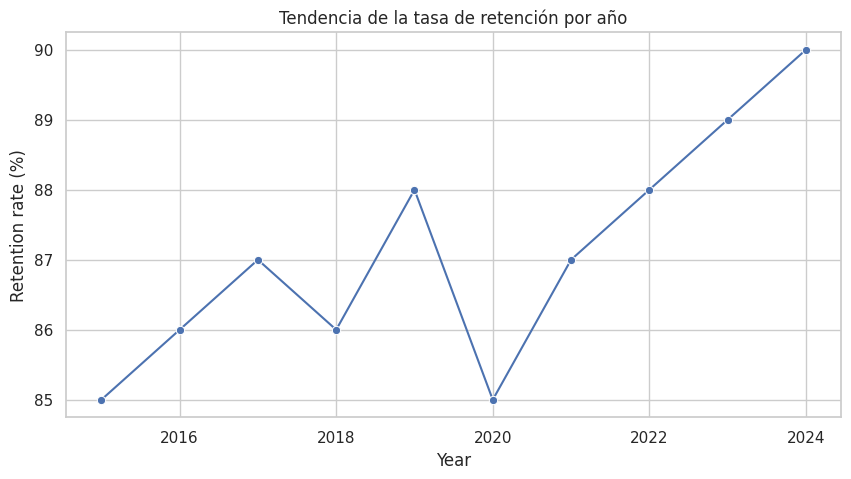

In [ ]:
# Intentar crear 'retention_rate' si no existe
if retention_col is None:
    # buscar columnas 'retained' y 'enrolled'
    retained_col = next((c for c in df.columns if 'retain' in c.lower() and 'rate' not in c.lower()), None)
    enrolled_col = next((c for c in df.columns if 'enroll' in c.lower() or 'enrolled' in c.lower()), None)
    if retained_col and enrolled_col:
        df['retention_rate'] = (df[retained_col] / df[enrolled_col]) * 100
        retention_col = 'retention_rate'
        print("Se creó 'retention_rate' usando", retained_col, "/", enrolled_col)
    else:
        print("No se encontró forma de crear 'retention_rate' automáticamente. Define manualmente la columna de retención.")
else:
    # si existe, aseguramos que sea numérica
    df[retention_col] = pd.to_numeric(df[retention_col], errors='coerce')

# Agrupar por año y graficar
if year_col and retention_col:
    df_year = df.groupby(year_col)[retention_col].mean().reset_index()
    plt.figure(figsize=(10,5))
    sns.lineplot(data=df_year, x=year_col, y=retention_col, marker='o')
    plt.title("Tendencia de la tasa de retención por año")
    plt.ylabel("Retention rate (%)")
    plt.xlabel(year_col)
    plt.grid(True)
    plt.show()
else:
    print("Necesitamos una columna de año y una de retención para esta gráfica. Verifica nombres detectados.")

#9) Visualización 2 — Satisfacción estudiantil por año
- Si existe `satisfaction_score` se usa directamente; si no, intenta detectar columnas relevantes.

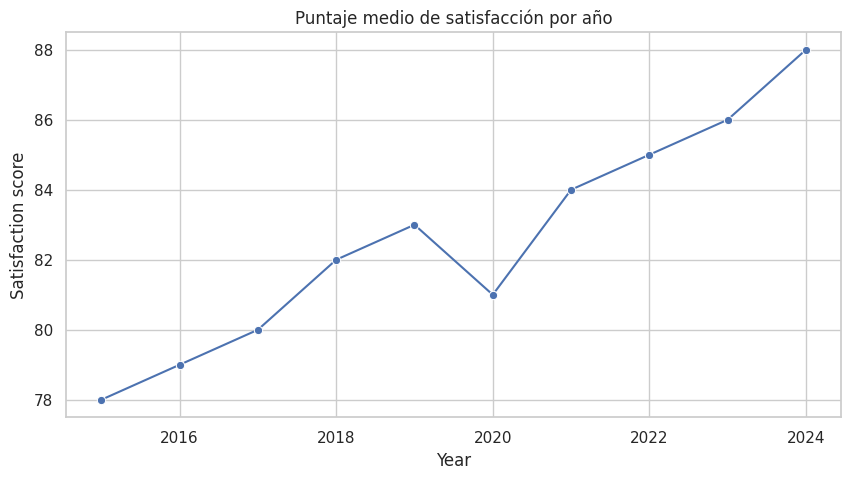

In [ ]:
if satisfaction_col:
    df[satisfaction_col] = pd.to_numeric(df[satisfaction_col], errors='coerce')
    if year_col:
        df_sat = df.groupby(year_col)[satisfaction_col].mean().reset_index()
        plt.figure(figsize=(10,5))
        sns.lineplot(data=df_sat, x=year_col, y=satisfaction_col, marker='o')
        plt.title("Puntaje medio de satisfacción por año")
        plt.ylabel("Satisfaction score")
        plt.xlabel(year_col)
        plt.show()
    else:
        # si no hay año, mostramos distribución
        plt.figure(figsize=(8,5))
        sns.histplot(df[satisfaction_col].dropna(), bins=20, kde=True)
        plt.title("Distribución de puntajes de satisfacción")
        plt.show()
else:
    print("No se detectó columna de satisfacción automáticamente. asigna `satisfaction_col` y vuelve a ejecutar.")

#10) Visualización 3 — Comparación entre Spring y Fall terms
- Filtramos por `term` y mostramos comparaciones (retención y satisfacción).

Términos detectados: ['Spring' 'Fall']


,Term,Retention Rate (%)
0,Fall,87.1
1,Spring,87.1


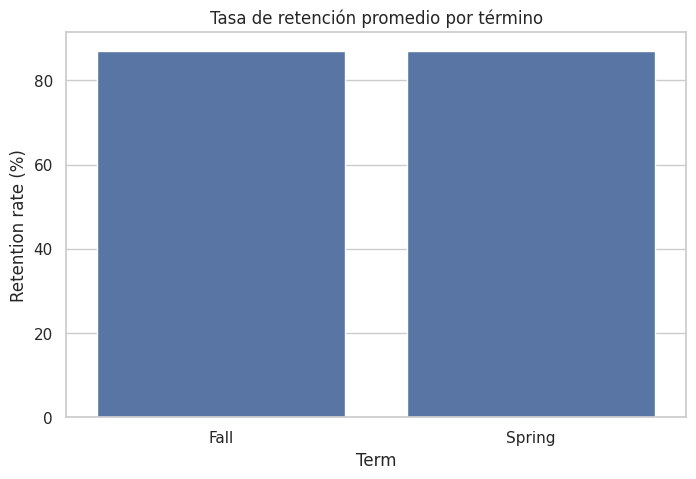

,Term,Student Satisfaction (%)
0,Fall,82.6
1,Spring,82.6


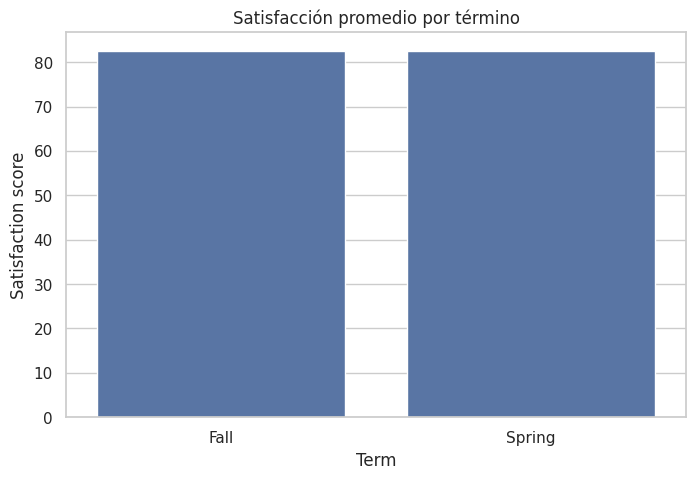

In [ ]:
if term_col:
    # normalizar valores (ej. 'Spring', 'Fall')
    df[term_col] = df[term_col].str.capitalize().str.strip()
    terms = df[term_col].unique()
    print("Términos detectados:", terms)

    # Retención por término
    if retention_col:
        term_ret = df.groupby(term_col)[retention_col].mean().reset_index().sort_values(retention_col, ascending=False)
        display(term_ret)
        plt.figure(figsize=(8,5))
        sns.barplot(data=term_ret, x=term_col, y=retention_col)
        plt.title("Tasa de retención promedio por término")
        plt.ylabel("Retention rate (%)")
        plt.show()
    # Satisfacción por término
    if satisfaction_col:
        term_sat = df.groupby(term_col)[satisfaction_col].mean().reset_index().sort_values(satisfaction_col, ascending=False)
        display(term_sat)
        plt.figure(figsize=(8,5))
        sns.barplot(data=term_sat, x=term_col, y=satisfaction_col)
        plt.title("Satisfacción promedio por término")
        plt.ylabel("Satisfaction score")
        plt.show()
else:
    print("No se encontró columna de término/semester. Si existe con otro nombre, indícalo en `term_col`.")

#11) Visualizaciones interactivas (Plotly) — opcional pero útiles para Streamlit

In [ ]:
# Línea interactiva de retención por año (Plotly)
if year_col and retention_col:
    fig = px.line(df.groupby(year_col)[retention_col].mean().reset_index(), x=year_col, y=retention_col,
                  title="Tendencia interactiva de retención por año", markers=True)
    fig.show()

# Boxplot interactivo de satisfacción por departamento (si existe department)
if dept_col and satisfaction_col:
    fig2 = px.box(df, x=dept_col, y=satisfaction_col, title="Satisfacción por departamento (boxplot)")
    fig2.show()

#12) Preparar dataset para Streamlit (guardar csv procesado)

In [ ]:
processed_path = "processed_university_student_data.csv"
df.to_csv(processed_path, index=False)
print("Archivo procesado guardado en:", processed_path)

Archivo procesado guardado en: processed_university_student_data.csv
